# 13. INTRODUCTION DEEP LEARNING

# 13.3. Stochastic Gradient Descent

# 13.3.1. COURS

In [2]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_13-INTRO_DEEP_LEARNING/input')

In [3]:
import pandas as pd
from IPython.display import display

In [4]:
red_wine = pd.read_csv('red-wine.csv')

In [5]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [6]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [7]:
# Une chose que vous pouvez noter pour l'instant est que nous avons 
# redimensionné chaque caractéristique pour qu'elle se situe dans l'intervalle
# [0,1]. Comme nous le verrons plus en détail dans la leçon 5, les réseaux 
# neuronaux ont tendance à donner de meilleurs résultats lorsque leurs entrées 
# sont à une échelle commune.

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [8]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692
...,...,...,...,...,...,...,...,...,...,...,...
640,0.469027,0.287671,0.569620,0.107692,0.064125,0.211268,0.120141,0.687738,0.504854,0.175758,0.153846
104,0.230088,0.253425,0.303797,0.100000,0.062392,0.056338,0.106007,0.451637,0.446602,0.090909,0.153846
815,0.548673,0.226027,0.417722,0.123077,0.112652,0.267606,0.113074,0.617669,0.359223,0.230303,0.369231
998,0.380531,0.493151,0.430380,0.038462,0.027730,0.042254,0.014134,0.416603,0.242718,0.090909,0.107692


In [9]:
y_train

1109    0.6
1032    0.4
1002    0.8
487     0.6
979     0.4
       ... 
640     0.4
104     0.4
815     0.4
998     0.6
1075    0.8
Name: quality, Length: 1119, dtype: float64

In [10]:
# Onze colonnes signifient onze entrées. Ne pas compter la target
print(X_train.shape)

(1119, 11)


In [11]:
# Nous avons choisi un réseau à trois couches avec plus de 1500 neurones. 
# Ce réseau devrait être capable d'apprendre des relations assez complexes 
# dans les données.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [12]:
# Après avoir défini le modèle, nous compilons dans l'optimiseur et la 
# fonction de perte.
model.compile(
    optimizer='adam',
    loss='mae',
)

In [13]:
# prêt pour l'entraînement
# Nous avons dit à Keras d'alimenter l'optimiseur avec 256 lignes de données 
# d'entraînement à la fois (la taille des lots) et de le faire 10 fois sur
# l'ensemble des données (les époques).
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 0s 28ms/step - loss: 0.2834 - val_loss: 0.1382
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1496 - val_loss: 0.1275
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1285 - val_loss: 0.1166
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1170 - val_loss: 0.1111
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1170 - val_loss: 0.1045
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1116 - val_loss: 0.1045
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1090 - val_loss: 0.1028
Epoch 8/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1057 - val_loss: 0.1025
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1021 - val_loss: 0.1006
Epoch 10/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1014 - val_loss: 0.1004


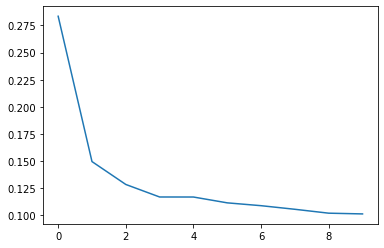

In [14]:
# tracé de la fonction perte
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

# 13.2.2. EXERCICES

In [16]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [18]:
fuel = pd.read_csv('fuel.csv')

In [19]:
X = fuel.copy()
# Remove target
y = X.pop('FE')

In [20]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

In [21]:
X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

In [22]:
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [24]:
# Uncomment to see original data
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [25]:
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# définiR le modèle 
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

# 1) Add Loss and Optimizer

In [27]:
# compiler le modèle avec une perte et un optimiseur,
model.compile(
    optimizer='adam',
    loss='mae',
)

# 2) Train Model

In [28]:
#  Formez le réseau pour 200 époques avec une taille de lot de 128. 
# Les données d'entrée sont X avec la cible y.
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 [==============================] - 0s 774us/step - loss: 2.8321
Epoch 2/200
9/9 [==============================] - 0s 776us/step - loss: 1.0406
Epoch 3/200
9/9 [==============================] - 0s 665us/step - loss: 0.5674
Epoch 4/200
9/9 [==============================] - 0s 776us/step - loss: 0.3310
Epoch 5/200
9/9 [==============================] - 0s 665us/step - loss: 0.2442
Epoch 6/200
9/9 [==============================] - 0s 886us/step - loss: 0.1995
Epoch 7/200
9/9 [==============================] - 0s 776us/step - loss: 0.1596
Epoch 8/200
9/9 [==============================] - 0s 776us/step - loss: 0.1307
Epoch 9/200
9/9 [==============================] - 0s 665us/step - loss: 0.1066
Epoch 10/200
9/9 [==============================] - 0s 665us/step - loss: 0.0939
Epoch 11/200
9/9 [==============================] - 0s 665us/step - loss: 0.0837
Epoch 12/200
9/9 [==============================] - 0s 776us/step - loss: 0.0756
Epoch 13/200
9/9 [===================

9/9 [==============================] - 0s 776us/step - loss: 0.0360
Epoch 103/200
9/9 [==============================] - 0s 665us/step - loss: 0.0296
Epoch 104/200
9/9 [==============================] - 0s 776us/step - loss: 0.0304
Epoch 105/200
9/9 [==============================] - 0s 665us/step - loss: 0.0326
Epoch 106/200
9/9 [==============================] - 0s 776us/step - loss: 0.0292
Epoch 107/200
9/9 [==============================] - 0s 665us/step - loss: 0.0315
Epoch 108/200
9/9 [==============================] - 0s 776us/step - loss: 0.0333
Epoch 109/200
9/9 [==============================] - 0s 665us/step - loss: 0.0281
Epoch 110/200
9/9 [==============================] - 0s 776us/step - loss: 0.0276
Epoch 111/200
9/9 [==============================] - 0s 665us/step - loss: 0.0328
Epoch 112/200
9/9 [==============================] - 0s 665us/step - loss: 0.0323
Epoch 113/200
9/9 [==============================] - 0s 665us/step - loss: 0.0313
Epoch 114/200
9/9 [===========

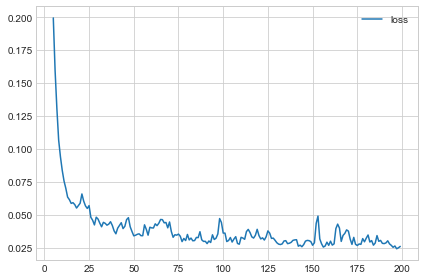

In [30]:
# une représentation graphique de la perte d'entraînement.
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

# 3) Evaluate Training

In [39]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "py")
# in standard python
# module_path = str(Path.cwd(__file__).parents[0] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)

# from modules import preparations
import tools
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('seaborn-whitegrid')

In [41]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.05
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

In [42]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.05
batch_size = 2
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

In [43]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.05
batch_size = 12
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

In [44]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.02
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

In [45]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.2
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

In [46]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 1.0
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

In [47]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.9
batch_size = 4096
num_examples = 8192

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

In [48]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.99
batch_size = 4096
num_examples = 8192

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)